# Data preperation

In [ ]:
import pandas as pd
import numpy as np
import random
import os
age = []
fbs = []
bp = []
chol = []
chest_pain = [] 
height = []
weight =[]
for i in range(20000):
    chpain_t = np.random.randint(0,2)
    chol_t = np.random.randint(150,351)
    fbs_t = np.random.randint(50,201)
    height_t = np.random.randint(140,191)
    weight_t = np.random.randint(35,111)
    bp_t = np.random.randint(75,261)
    if i%5==0 or i%3==0:
        age_t = np.random.choice([np.random.randint(20,46),np.random.randint(71,86)])
    else:
        age_t = np.random.randint(45,71)
    age.append(age_t)
    height.append(height_t)
    weight.append(weight_t)
    chest_pain.append(chpain_t)
    bp.append(bp_t)
    fbs.append(fbs_t)
    chol.append(chol_t)

In [ ]:
heart_dict = {'age':age, 'height':height, 'weight':weight, 'chest_pain':chest_pain, 'bp':bp, 'fbs':fbs, 'chol':chol}
df_heart = pd.DataFrame(heart_dict)
df_heart.to_csv("heart_data.csv",index=False)

# Data Filtering

In [ ]:
df = pd.read_csv('heart_data.csv')
df1 = pd.read_csv('heart_data.csv')
risk = []
rule = []
for i in range(len(df)):
    bmi = round(((df.iloc[i,2])/((df.iloc[i,1]/100)**2)),2)
    temp = df.iloc[i,:].tolist()
    if((temp[5]>120 and temp[4]>145 and temp[0]>52) or (bmi>=24.5 and temp[6]>210) or (temp[3]==1 and temp[6]>200 and temp[0]>56)):
        risk.append(1)
#         rule.append(1)
    elif((temp[4]>150 and temp[6]>210) or (temp[3]==1 and temp[4]<150 and temp[6]>200) or (temp[5]>=120 and temp[0]>60 and temp[6]<200)):
        risk.append(1)
#         rule.append(2)
    elif((temp[3]==0 and (bmi in range(18,25)) and temp[6]<190 and temp[0]<30) or (temp[5]<120 and temp[6]<190 and temp[0]<40)):
        risk.append(0)
#         rule.append(3)
    else:
        risk.append(0)
#         rule.append(0)
         

In [ ]:
df_yes = df1[df1.risk == 1]
df_no = df1[df1.risk == 0]
df_new = df1.iloc[-1:-1,:]
df_new = df_new.append(df_no,ignore_index=True)
df_new = df_new.iloc[:3824,:]
df_new = df_new.append(df_yes,ignore_index=True)

In [ ]:
df_new

In [ ]:
df_new = df_new.iloc[:10000,:]
from sklearn.utils import shuffle
df_new = shuffle(df_new).reset_index(drop=True)
df_new.to_csv('heart_pred_data1.csv',index=False)

# MLP CODE

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from matplotlib.colors import ListedColormap
df = pd.read_csv('heart_pred_data.csv')
print("----------------------------------Data------------------------------------")
print(df)

----------------------------------Data------------------------------------
      age  height  weight  chest_pain   bp  fbs  chol  risk
0      67     141      35           1  185   84   333     1
1      73     164      46           1  231  123   208     1
2      59     158      86           1   93   61   194     0
3      59     154      54           1   98  187   265     1
4      36     186     103           0  186  131   325     1
...   ...     ...     ...         ...  ...  ...   ...   ...
9995   77     174      66           0  193  188   207     1
9996   47     182      86           1  220  134   245     1
9997   77     152      72           1  245   50   204     1
9998   75     170     107           0  239  137   160     1
9999   49     170      67           0  107   53   322     0

[10000 rows x 8 columns]


# outliers

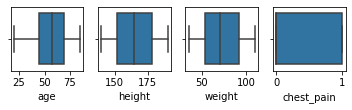

In [8]:
ax2=plt.subplot(341, frameon=True)
sns.boxplot(x=df['age'])
ax2=plt.subplot(342, frameon=True)
sns.boxplot(x=df['height'])
ax2=plt.subplot(343, frameon=True)
sns.boxplot(x=df['weight'])
ax2=plt.subplot(344, frameon=True)
sns.boxplot(x=df['chest_pain'])



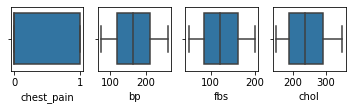

In [7]:
ax2=plt.subplot(341, frameon=True)
sns.boxplot(x=df['chest_pain'])
ax2=plt.subplot(342, frameon=True)
sns.boxplot(x=df['bp'])
ax2=plt.subplot(343, frameon=True)
sns.boxplot(x=df['fbs'])
ax2=plt.subplot(344, frameon=True)
sns.boxplot(x=df['chol'])

# histogram

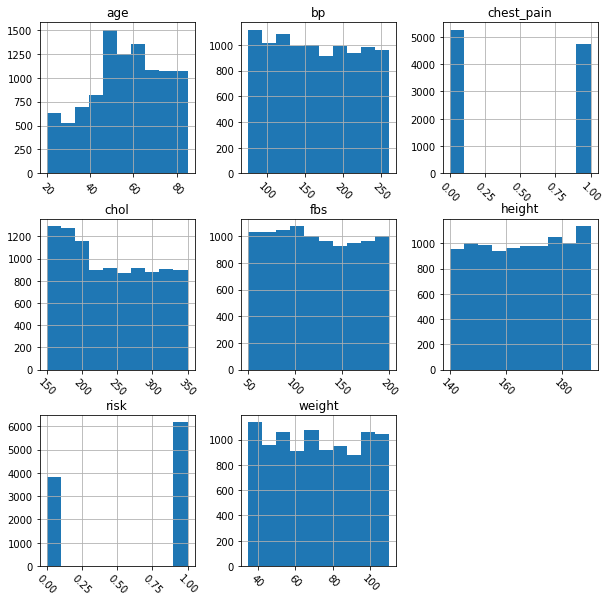

In [9]:
df.hist(figsize=(10,10), xrot=-45, bins=10)
plt.show()

# Correlation

In [ ]:
corr = df.corr()
corr

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Correlation HeatMap")
sns.heatmap(corr)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [10]:
df1 = df.iloc[9000:,:]
df = df.iloc[:9000,:]
test_XX = df1.iloc[:,:-1].values
actual_yy = df1.iloc[:,-1].values
actual_y = actual_yy.tolist()
df

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,67,141,35,1,185,84,333,1
1,73,164,46,1,231,123,208,1
2,59,158,86,1,93,61,194,0
3,59,154,54,1,98,187,265,1
4,36,186,103,0,186,131,325,1
...,...,...,...,...,...,...,...,...
8995,45,152,52,0,99,68,281,0
8996,59,149,103,0,145,164,174,0
8997,59,163,77,0,225,77,175,0
8998,65,175,82,1,171,62,168,0


In [11]:
df.risk.value_counts()

1    5555
0    3445
Name: risk, dtype: int64

In [12]:
X = df.iloc[:,:7]
Y = df.iloc[:,-1]
db_no =df[df.risk == 0]
db_yes = df[df.risk == 1]
X_features = list( df.columns )[:-1]
print("Features: ",X_features)
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.2,random_state = 65)

Features:  ['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']


In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit( train_X, train_y)
pred_y1 = mlp.predict(test_X)


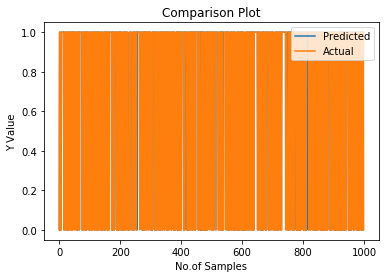

In [14]:
pred = mlp.predict(test_XX)
def comaprison_plot(pred,actual):
    plt.plot(np.arange(1000),pred,label='Predicted')
    plt.plot(np.arange(1000),actual,label='Actual')
    plt.xlabel('No.of Samples')
    plt.ylabel('Y Value')
    plt.legend(loc='upper right')
    plt.title('Comparison Plot')
    plt.show()

comaprison_plot(pred,actual_yy)


In [15]:
r21=r2_score(test_y, pred_y1) 
mse1=mean_squared_error(test_y, pred_y1)
print("R Squared Error : ",r21)
print("Mean Squared Error : ",mse1)

R Squared Error :  0.6164525544180957
Mean Squared Error :  0.09


# Heat_MAP

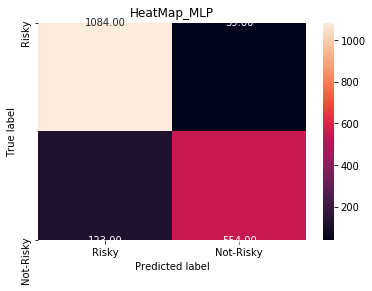

In [16]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_MLP')
    plt.show()
draw_cm(test_y,pred_y1 )

# CLASSIFICATION_REPORT

In [17]:
print( metrics.classification_report( test_y, pred_y1 ) )

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       677
           1       0.90      0.97      0.93      1123

    accuracy                           0.91      1800
   macro avg       0.92      0.89      0.90      1800
weighted avg       0.91      0.91      0.91      1800



# MODEL_PERFOMENCE

In [18]:
acc1 = metrics.accuracy_score(test_y, pred_y1)
print("Accuracy:",acc1)

prec1 = metrics.precision_score(test_y, pred_y1)
print("Precision:",prec1)

recall1 = metrics.recall_score(test_y, pred_y1)
print("Recall:",recall1)

f1sc1 = metrics.f1_score(test_y, pred_y1)
print("F1-Score:",f1sc1)

kappa1 = metrics.cohen_kappa_score(test_y, pred_y1)
print("Kappa-Stat:",kappa1)

Accuracy: 0.91
Precision: 0.8980944490472246
Recall: 0.9652715939447908
F1-Score: 0.930472103004292
Kappa-Stat: 0.803381885511079


# ROC_CURVE

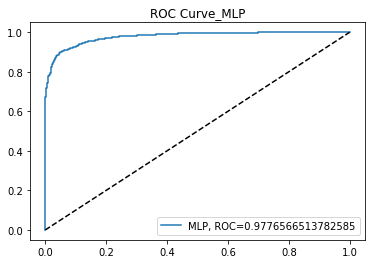

In [19]:
y_pred_proba1 = mlp.predict_proba(test_X)[:,1]
fpr1, tpr1, _ = metrics.roc_curve( test_y,  y_pred_proba1)
auc1 = metrics.roc_auc_score( test_y, y_pred_proba1)
plt.plot(fpr1,tpr1,label="MLP, ROC="+str(auc1))
plt.legend(loc=4)
plt.title('ROC Curve_MLP')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# lift_CURVE

In [20]:
predicted_probas1 = mlp.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas1)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.legend('')
plt.title("Cumulative Gains Curve - MLP")
plt.show()

NameError: name 'skplt' is not defined